In [1]:
# !gdown 1iGP-v9UCu0o6pT5_0A8Mf4SiW4jQyEJg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Problem statement

- Provide strategic business recommendations based on the creditworthiness assessment and optimal repayment terms. This includes insights on risk management, targeted customer segments, and potential product enhancements to enhance LoanTap's competitiveness in the personal loan market.
- By addressing these three aspects, the data science team can contribute to LoanTap's goal of delivering personalized and sustainable loan products while maintaining a prudent approach to risk management in the personal loan segment

In [3]:
df = pd.read_csv("logistic_regression.csv")

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.shape

(396030, 27)

In [6]:
print(" Object :"
      ,df.select_dtypes(include="object").shape[1],"\n","Numerical :",df.select_dtypes(exclude="object").shape[1])
print(" DF: ",df.shape[1])

 Object : 15 
 Numerical : 12
 DF:  27


We have 12 numerical and 15 categorical datatypes

In [7]:
df_obj = df.select_dtypes(include = "object")

In [8]:
df["loan_status"]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [9]:
df['title']=df["title"].str.lower()


In [10]:
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts(normalize=True)

home_ownership
MORTGAGE    0.500841
RENT        0.403480
OWN         0.095311
OTHER       0.000369
Name: proportion, dtype: float64

### Loan status is the target variable. It has two categories 
1. Fully Paid
2. Charged off

We have to build a logistic regression model to fit to this problem statement

##  EDA

In [11]:
df_num = df.select_dtypes(exclude = "object")

In [12]:
df_num.shape

(396030, 12)

In [13]:
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [14]:
df.isna().sum()/df.count()*100

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_title                6.144952
emp_length               4.845008
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
title                    0.445376
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.069740
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.550337
pub_rec_bankruptcies     0.135274
address                  0.000000
dtype: float64

We see that atere are few missing values in features like emp_title,mort_acc,emp_length.

In [15]:
df.dropna(inplace = True)

In [16]:
df.isna().sum()/df.count()*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

Decided to remove tyhe missing values as it's a very low proportion

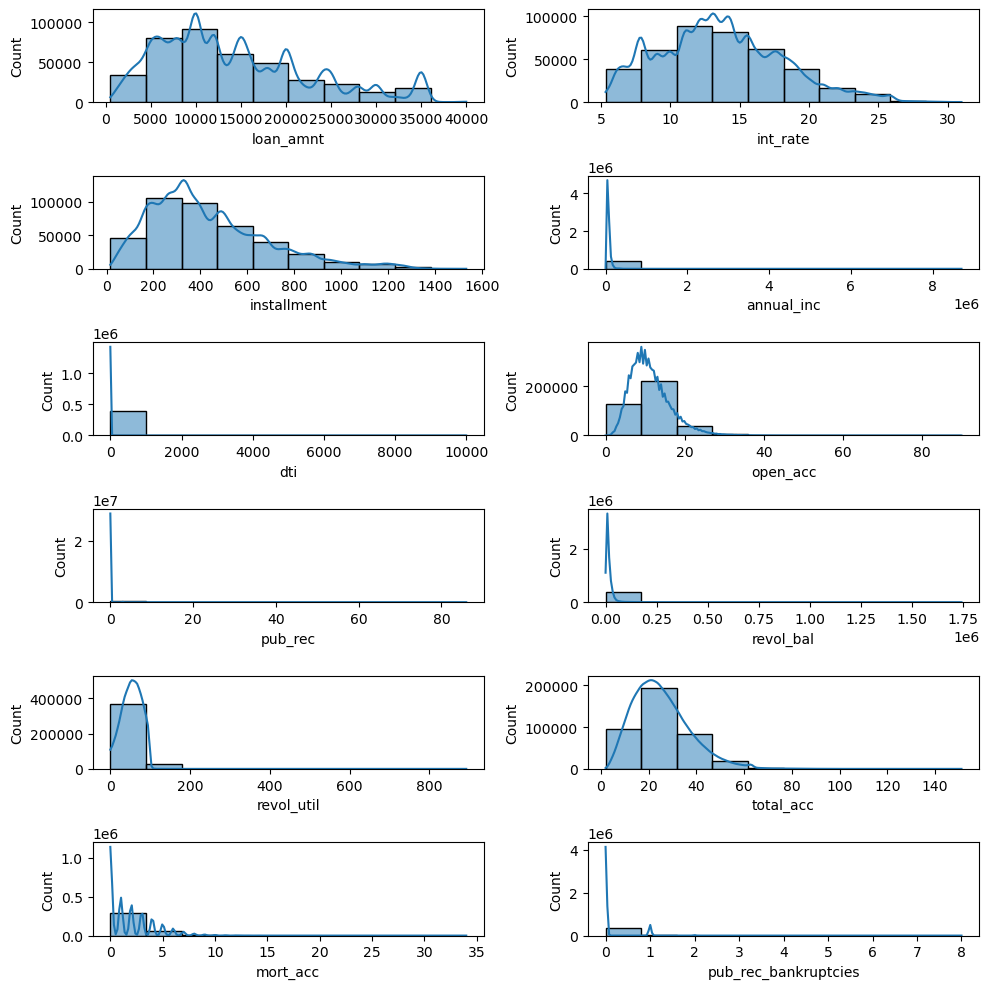

In [17]:
cols = df_num.columns.to_list()
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    ax = plt.subplot(6,2,i+1)

    sns.histplot(data = df_num,x = cols[i],kde=True,bins = 10)
plt.tight_layout()
plt.show()

We see that most of the features are not normal not balanced.

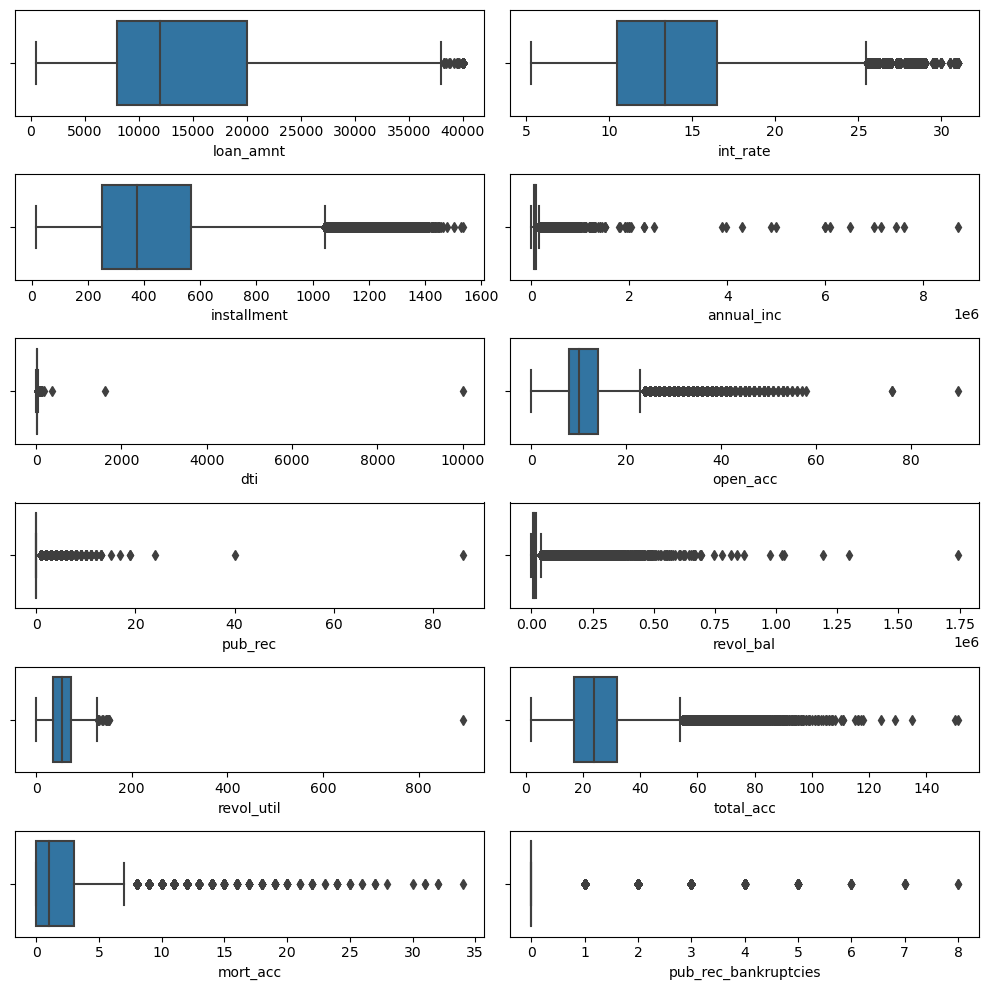

In [18]:
cols = df_num.columns.to_list()
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    ax = plt.subplot(6,2,i+1)

    sns.boxplot(data = df_num,x = cols[i])
plt.tight_layout()
plt.show()

We have outliers in almost all the numerical columns

In [19]:
df_obj = df.select_dtypes(include = "object")
df_obj

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,credit card refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,36 months,B,B4,Michael's Arts & Crafts,5 years,RENT,Not Verified,Mar-2013,Fully Paid,debt_consolidation,credit buster,Nov-1991,w,INDIVIDUAL,"514 Cynthia Park Apt. 402\r\nWest Williamside,..."
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."


<Axes: >

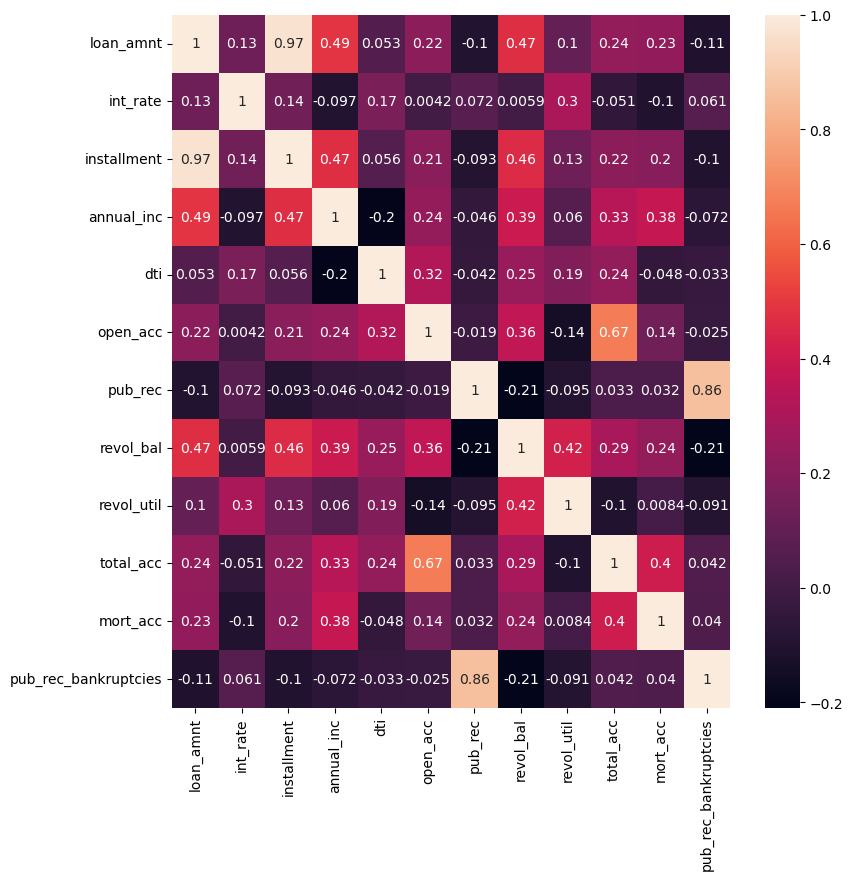

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(df_num.corr(method='spearman'),annot=True)


From the heat map we see a high correlation between loan amount and installment. This must be removed.

In [21]:
df.drop(columns = "installment",inplace = True)

In [22]:
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,Not Verified,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\r\nWest Williamside,..."
396025,10000.0,60 months,10.99,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."


<Axes: xlabel='loan_status', ylabel='proportion'>

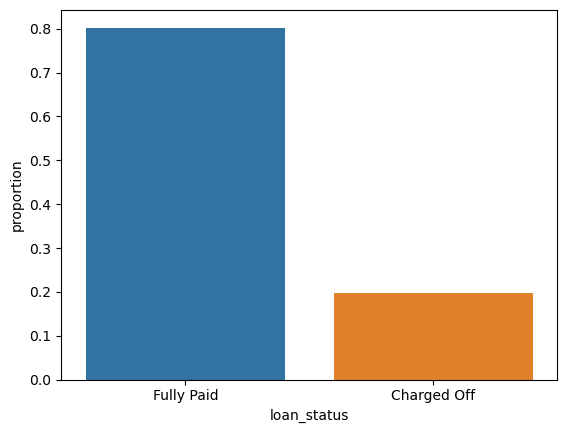

In [23]:
sns.barplot(x = df["loan_status"].value_counts(normalize=True).index,y=df["loan_status"].value_counts(normalize=True))

We see most of the loan has been paid off as compared to charging off.

In [24]:
grade_df = df.groupby(["grade","loan_status"])["loan_status"].value_counts().reset_index()
subgrade_df = df.groupby(["sub_grade","loan_status"])["loan_status"].value_counts().reset_index()

In [25]:
grade_df

,grade,loan_status,count
0,A,Charged Off,3050
1,A,Fully Paid,48073
2,B,Charged Off,11959
3,B,Fully Paid,86049
4,C,Charged Off,19443
5,C,Fully Paid,72770
6,D,Charged Off,15848
7,D,Fully Paid,38791
8,E,Charged Off,10328
9,E,Fully Paid,16795


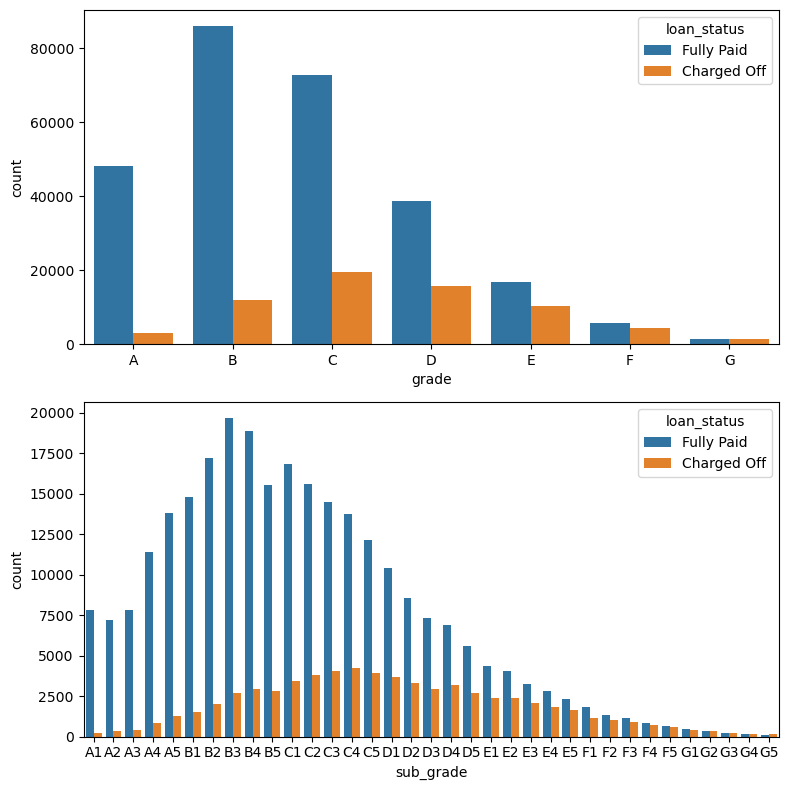

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.countplot(  data = df,x = "grade",hue="loan_status",order=sorted(df["grade"].unique()))
plt.subplot(2,1,2)
sns.countplot(  data = df,x = "sub_grade",hue="loan_status",order=sorted(df["sub_grade"].unique()))
plt.tight_layout()
plt.show()

most people applying and re-paying the loan are form grade B and C.
We can see the subgrade distribution as well.

In [27]:
grade_df = df.groupby(["grade","loan_status"])[["grade","loan_status"]].value_counts().reset_index()

In [28]:
grade_df[grade_df["grade"] == "A"]

,grade,loan_status,count
0,A,Charged Off,3050
1,A,Fully Paid,48073


In [29]:
48073/(48073+3050)

0.9403399643995853

In [30]:
lis = df["emp_title"].value_counts().sort_values(ascending=False)[:20].index
val = df["emp_title"].value_counts().sort_values(ascending=False)[:20]

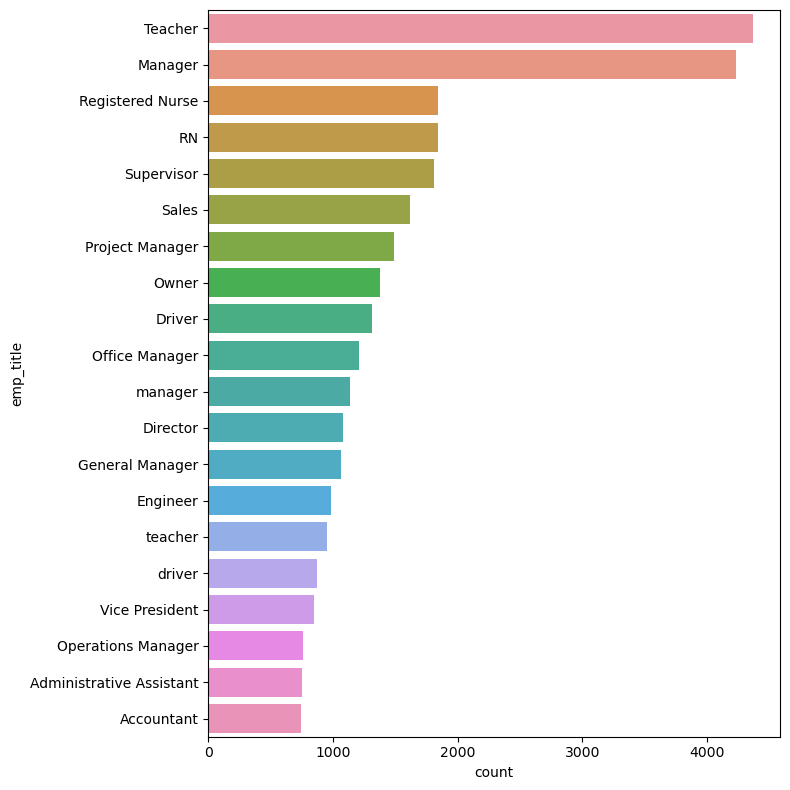

In [31]:
plt.figure(figsize=(8,8))
sns.barplot(x=val,y=lis,orient="h")
plt.tight_layout()
# plt.xticks(rotation=90)
plt.show()

Teacher and Manager are the two most afforded job titles

## Outlier treatment

In [32]:
cols = df_num.columns.to_list()[:-1]

In [33]:
cols.remove("installment")

In [34]:
cols

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc']

In [35]:
for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    lower_limt, upper_limit = mean-3*std, mean+3*std
    df = df[ (df[col] > lower_limt) & (df[col] < upper_limit) ]
df.shape

(312060, 26)

## preprocessing

In [36]:
df["add_pincode"]=df["address"].str.split(", ",expand=True)[1]

In [37]:
df.drop(columns="address",inplace=True)

In [38]:
df["add_code"] = df["add_pincode"].str.split(" ",expand=True)[0]
df["add_pin"] = df["add_pincode"].str.split(" ",expand=True)[1]

In [39]:
df = df.drop(columns="add_pincode")

In [40]:
df["issue_month"] = df["issue_d"].str.split("-",expand=True)[0]
df["issue_year"] = df["issue_d"].str.split("-",expand=True)[1]


In [41]:
df = df.drop(columns="issue_d")

In [42]:
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,add_code,add_pin,issue_month,issue_year
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,OK,22690,Jan,2015
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,SD,05113,Jan,2015
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,WV,05113,Jan,2015
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,MA,00813,Nov,2014
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,VA,11650,Apr,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,Not Verified,...,97.1,9.0,w,INDIVIDUAL,0.0,0.0,SC,05113,Mar,2013
396025,10000.0,60 months,10.99,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,...,34.3,23.0,w,INDIVIDUAL,0.0,0.0,DC,30723,Oct,2015
396026,21000.0,36 months,12.29,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,...,95.7,8.0,f,INDIVIDUAL,1.0,0.0,LA,05113,Feb,2015
396027,5000.0,36 months,9.99,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,...,66.9,23.0,f,INDIVIDUAL,0.0,0.0,NY,70466,Oct,2013


In [43]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396024    Nov-1991
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
Name: earliest_cr_line, Length: 312060, dtype: object

In [44]:
df["earliest_cr_line_month"] = df["earliest_cr_line"].str.split("-",expand=True)[0]
df["earliest_cr_line_year"] = df["earliest_cr_line"].str.split("-",expand=True)[1]

In [45]:
df = df.drop(columns="earliest_cr_line")

In [46]:
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,add_code,add_pin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,w,INDIVIDUAL,0.0,0.0,OK,22690,Jan,2015,Jun,1990
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,f,INDIVIDUAL,3.0,0.0,SD,05113,Jan,2015,Jul,2004
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,f,INDIVIDUAL,0.0,0.0,WV,05113,Jan,2015,Aug,2007
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,f,INDIVIDUAL,0.0,0.0,MA,00813,Nov,2014,Sep,2006
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,f,INDIVIDUAL,1.0,0.0,VA,11650,Apr,2013,Mar,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,Not Verified,...,w,INDIVIDUAL,0.0,0.0,SC,05113,Mar,2013,Nov,1991
396025,10000.0,60 months,10.99,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,...,w,INDIVIDUAL,0.0,0.0,DC,30723,Oct,2015,Nov,2004
396026,21000.0,36 months,12.29,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,...,f,INDIVIDUAL,1.0,0.0,LA,05113,Feb,2015,Feb,2006
396027,5000.0,36 months,9.99,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,...,f,INDIVIDUAL,0.0,0.0,NY,70466,Oct,2013,Mar,1997


#### Label enocding for cat features

In [47]:
label_encoder = LabelEncoder()

In [48]:
df['term'] = label_encoder.fit_transform(df['term'])
df['grade'] = label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['emp_length'] = label_encoder.fit_transform(df['emp_length'])
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['pub_rec'] = label_encoder.fit_transform(df['pub_rec'])
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])
df['application_type'] = label_encoder.fit_transform(df['application_type'])
df['mort_acc'] = label_encoder.fit_transform(df['mort_acc'])
df['pub_rec_bankruptcies'] = label_encoder.fit_transform(df['pub_rec_bankruptcies'])
df['add_code'] = label_encoder.fit_transform(df['add_code'])
df['add_pin'] = label_encoder.fit_transform(df['add_pin'])
df['open_acc'] = label_encoder.fit_transform(df['open_acc'])
df['issue_month'] = label_encoder.fit_transform(df['issue_month'])
df['issue_year'] = label_encoder.fit_transform(df['issue_year'])
df['earliest_cr_line_month'] = label_encoder.fit_transform(df['earliest_cr_line_month'])
df['earliest_cr_line_year'] = label_encoder.fit_transform(df['earliest_cr_line_year'])

In [49]:
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,add_code,add_pin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,1,8,Marketing,1,3,117000.0,0,...,1,1,0,0,37,1533,4,3,6,40
1,8000.0,0,11.99,1,9,Credit analyst,4,0,65000.0,0,...,0,1,3,0,42,335,4,3,5,54
2,15600.0,0,10.49,1,7,Statistician,10,3,43057.0,1,...,0,1,0,0,50,335,4,3,1,57
3,7200.0,0,6.49,0,1,Client Advocate,6,3,54000.0,0,...,0,1,0,0,20,58,9,2,11,56
4,24375.0,1,17.27,2,14,Destiny Management Inc.,9,0,55000.0,2,...,0,1,1,0,46,783,0,1,7,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,0,13.11,1,8,Michael's Arts & Crafts,5,3,64000.0,0,...,1,1,0,0,41,335,7,1,9,41
396025,10000.0,1,10.99,1,8,licensed bankere,2,3,40000.0,1,...,1,1,0,0,8,2057,10,3,9,54
396026,21000.0,0,12.29,2,10,Agent,5,0,110000.0,1,...,0,1,1,0,19,335,3,3,3,56
396027,5000.0,0,9.99,1,5,City Carrier,1,3,56500.0,2,...,0,1,0,0,35,4738,10,1,7,47


Target encoding the features that are not possible by label or one hot

In [50]:
encoder = TargetEncoder()

In [51]:
data_encoded = encoder.fit_transform(df['emp_title'], df['loan_status'])
title_encoded = encoder.fit_transform(df['title'], df['loan_status'])

In [52]:
df["emp_title"] =data_encoded
df["title"] =title_encoded

In [53]:
df

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,add_code,add_pin,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,1,8,0.759115,1,3,117000.0,0,...,1,1,0,0,37,1533,4,3,6,40
1,8000.0,0,11.99,1,9,0.781187,4,0,65000.0,0,...,0,1,3,0,42,335,4,3,5,54
2,15600.0,0,10.49,1,7,0.801541,10,3,43057.0,1,...,0,1,0,0,50,335,4,3,1,57
3,7200.0,0,6.49,0,1,0.827856,6,3,54000.0,0,...,0,1,0,0,20,58,9,2,11,56
4,24375.0,1,17.27,2,14,0.697747,9,0,55000.0,2,...,0,1,1,0,46,783,0,1,7,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,0,13.11,1,8,0.827856,5,3,64000.0,0,...,1,1,0,0,41,335,7,1,9,41
396025,10000.0,1,10.99,1,8,0.827856,2,3,40000.0,1,...,1,1,0,0,8,2057,10,3,9,54
396026,21000.0,0,12.29,2,10,0.792683,5,0,110000.0,1,...,0,1,1,0,19,335,3,3,3,56
396027,5000.0,0,9.99,1,5,0.715461,1,3,56500.0,2,...,0,1,0,0,35,4738,10,1,7,47


In [54]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

### Min max scaler

In [55]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.30,stratify=y,random_state=46)
print(X_train.shape)
print(X_test.shape)

(218442, 28)
(93618, 28)


In [56]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [57]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression 0.88


### confusion matrix

In [59]:
confusion_matrix=confusion_matrix(y_test,y_pred)


<Axes: >

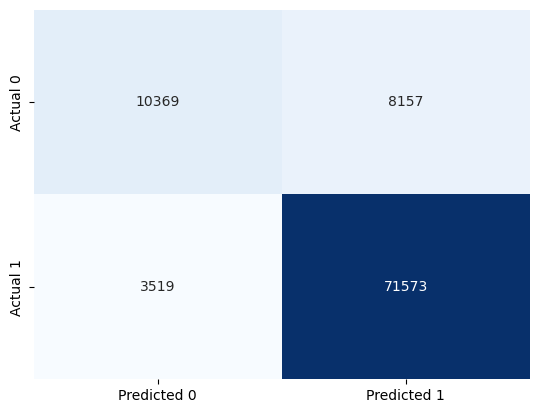

In [60]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [61]:
print("Precision: ",round(71573/(71573+8157),2))
print("Recall   : ",round(71573/(71573+3519),2))

Precision:  0.9
Recall   :  0.95


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.56      0.64     18526
           1       0.90      0.95      0.92     75092

    accuracy                           0.88     93618
   macro avg       0.82      0.76      0.78     93618
weighted avg       0.87      0.88      0.87     93618



In [63]:
zip_data = zip(df.columns.to_list(),logreg.coef_.tolist()[0])
di={}
for i, j in zip_data:
    print(i,"\t\t:",abs(j))

loan_amnt 		: 0.5207814582751287
term 		: 0.4650544924022158
int_rate 		: 2.1875765615931257
grade 		: 0.020553268413122983
sub_grade 		: 4.354897068293667
emp_title 		: 10.879223182329909
emp_length 		: 0.15010283943743732
home_ownership 		: 0.2958026507377882
annual_inc 		: 0.1628208000031674
verification_status 		: 0.09633732254872332
loan_status 		: 0.6037208942821554
purpose 		: 3.2747521839779616
title 		: 0.9044992432698863
dti 		: 1.0250754433441693
open_acc 		: 0.0664237111983146
pub_rec 		: 0.2576280677288658
revol_bal 		: 0.8320872398554355
revol_util 		: 0.4163264705196112
total_acc 		: 0.06784190575373576
initial_list_status 		: 1.2570872123993933
application_type 		: 0.21335883560963415
mort_acc 		: 0.19213516443651515
pub_rec_bankruptcies 		: 0.5305338336441793
add_code 		: 2.270692430823095
add_pin 		: 0.07897593161001909
issue_month 		: 0.7947844307588472
issue_year 		: 0.02085759675221269
earliest_cr_line_month 		: 0.10902034351782787


weights of each of these faetures. Could remove the unimportant ones

### ROC AUC Curve

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [65]:
roc_auc = roc_auc_score(y_test,logreg.predict(X_test))

In [66]:
fpr, tpr, thresholds = roc_curve(y_test,logreg.predict(X_test))

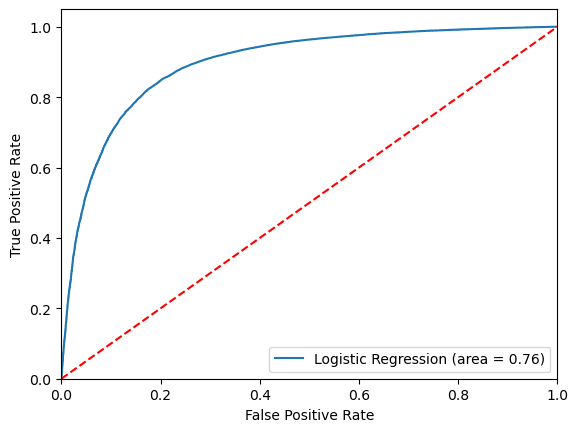

In [67]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

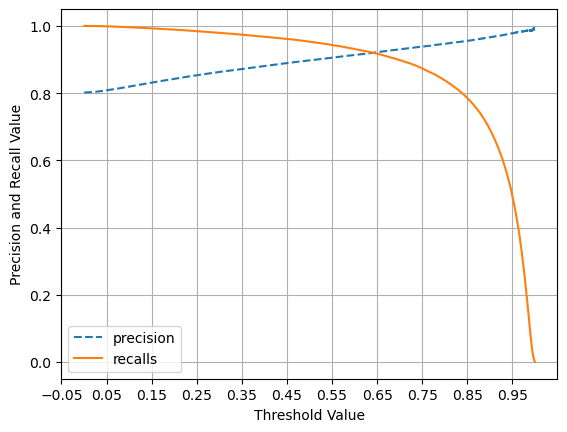

In [68]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,logreg.predict_proba(X_test)[:,1])

### Multicolinearity check

In [69]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(x)[:5]

,Feature,VIF
19,application_type,504.74
11,title,464.93
2,int_rate,434.93
4,sub_grade,255.82
5,emp_title,214.84


In [70]:
x.drop(columns=['application_type'],axis=1,inplace=True)
calc_vif(x)[:5]

,Feature,VIF
2,int_rate,419.43
11,title,282.92
4,sub_grade,251.62
5,emp_title,199.06
3,grade,64.69


In [71]:
x.drop(columns=['int_rate'],axis=1,inplace=True)
calc_vif(x)[:5]

,Feature,VIF
10,title,232.90
4,emp_title,195.07
3,sub_grade,89.41
2,grade,64.64
25,earliest_cr_line_year,59.13


In [72]:
x.drop(columns=['title'],axis=1,inplace=True)
calc_vif(x)[:5]

,Feature,VIF
3,sub_grade,89.19
4,emp_title,73.45
2,grade,64.49
24,earliest_cr_line_year,50.79
15,total_acc,14.15


In [73]:
x.drop(columns=['sub_grade'],axis=1,inplace=True)
calc_vif(x)[:5]

,Feature,VIF
3,emp_title,73.20
23,earliest_cr_line_year,50.56
14,total_acc,14.15
10,open_acc,12.47
13,revol_util,9.24


In [74]:
X=scaler.fit_transform(x)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(logreg,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.2f}".format(accuracy))

Cross Validation accuracy : 0.87


## Actionable insights and recommendations

- Around 80% of customers have fully paid their Loan Amount. The defaulters are ~ 20%. From Personal loan business perspective this ratio is high. These 20% will contribute in NPAs of LoanTap. To reduce the risk of NPAs, LoanTap should consider setting up rules to bring down this ratio.
- LoanTap should provide loans at slightly higher rate than other Banks. 
- Overall Statistics of the Model:
 -- Accuracy = 88%
-- Precision = 90%
-- Recall = 95%
-- F1 -score = 92%
- Model created has high values for accuracy, precision, recall & f1-score. This means, this model is a good classifier.  However this model has slightly low capability on correctly identifying defaulters. 

- Features which have significant impact on outcome are as follow:

-- int_rate: Interest Rate
-- sub_grade: loan subgrade
-- term : number of payments on the loan
-- home_ownership
-- purpose
-- application_type
-- pincode (from address)
-- emp_title: job title supplied by the Borrower
- sub_grade and grade logic to classify persons by LoanTap is well created. 
- LoanTap can increase their market presence in Pincodes with Positive Coefficient. LoanTap should minimize their marketing/sales expenditure in Pincodes with Negative Coefficient.
